# Global Food and Agricultural Industry Trends
### An Analysis by John Villanueva

Questions explored:
 - What happened in 1992 to cause a spike in year over year Global Food growth?
 - What food industries in Southeast Asia (SEA) have trended since 1961?
 - Globally, how much feed output is used to produce livestock output for food?

## The Data Set

The data set in question was collected and organized by the Food and Agriculture Organization (FAO) of the United Nations. Spanning from 1961 to 2013, it contains a comprehensive list production outputs by country, food industry, and year. The data set also distinguishes between food and feed, with many item industries producing a food output and a seperate feed output. Food and Feed are defined as follows:

- Food: refers to the total amount of the food item available as human food during the reference period.
- Feed: refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

These terms make the important distinction between production and availability. Rather than listing how much is produced or consumed during the reference year, the dataset instead tells how much is available for consumption during that year.

Taking a look at the data, we see the categories for country, item (industry), food/feed element, and a time series for the available output for consumption:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

faodf = pd.read_csv('FAO.csv', encoding='latin-1')
faodf.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


The units are only Kilotonnes (I will use the UK spelling because I'm fancy). And listed below are a few other figures for summary:

In [3]:
print('All time series data are listed in units of {}.'.format(faodf['Unit'].unique()[0]))
print('There are {} different items.'.format(len(faodf['Item'].unique())))
print('{} of these items are listed as Food and {} of them are listed as Feed.'.format(faodf[faodf['Element']=='Food']['Item'].nunique(),faodf[faodf['Element']=='Feed']['Item'].nunique()))
print('This means that all all items are listed as food items, and while all Feed items are also Food items, the opposite is not true.')

All time series data are listed in units of 1000 tonnes.
There are 115 different items.
115 of these items are listed as Food and 88 of them are listed as Feed.
This means that all all items are listed as food items, and while all Feed items are also Food items, the opposite is not true.


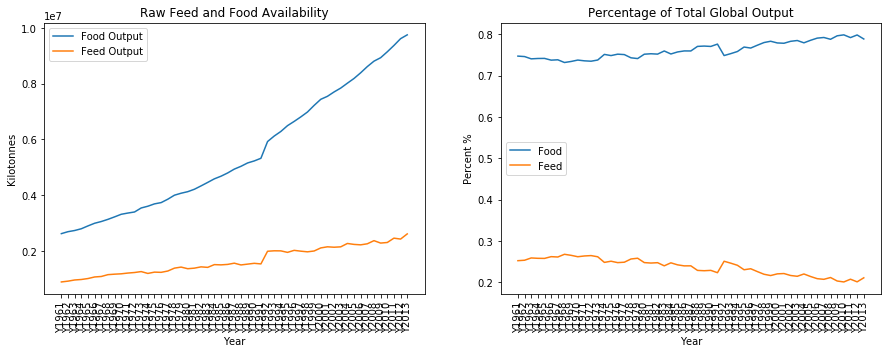

In [4]:
FoodOutput = faodf.loc[faodf['Element'] == 'Food'].groupby('Element').sum().iloc[:,5:].T
FeedOutput = faodf.loc[faodf['Element'] == 'Feed'].groupby('Element').sum().iloc[:,5:].T
TotOutput = faodf.sum()[10:].to_frame()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(FoodOutput, label='Food Output')
plt.plot(FeedOutput, label='Feed Output')
plt.legend(loc=2)
plt.xticks(rotation=90)
plt.title('Raw Feed and Food Availability')
plt.ylabel('Kilotonnes')
plt.xlabel('Year')

plt.subplot(1,2,2)
plt.plot(FoodOutput.iloc[:,0]/TotOutput[0], label='Food')
plt.plot(FeedOutput.iloc[:,0]/TotOutput[0], label='Feed')
plt.legend(loc=6)
plt.xticks(rotation=90)
plt.title('Percentage of Total Global Output')
plt.ylabel('Percent %')
plt.xlabel('Year')

plt.show()

The plots above of raw food and feed outputs and their percentage of total global output show how much more mass Food items comprise the global market share compared to feed items. Feed items, afterall, do eventually become food items.

For the sake of exploration, we also want to look at the distribution of item industry output. Focusing on the 2013 outputs, the distribution is visualized roughly using a boxplot and more rigorously with histograms and a Quantile-Quatile (QQ) plot.

In [60]:
#Creating dataframes to organize output by country and item industry, these variables will be used through the analysis
CountryOutput = faodf.groupby('Area').sum().drop(['Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'], axis=1)
IndustryOutput = faodf.groupby('Item').sum().drop(['Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'], axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


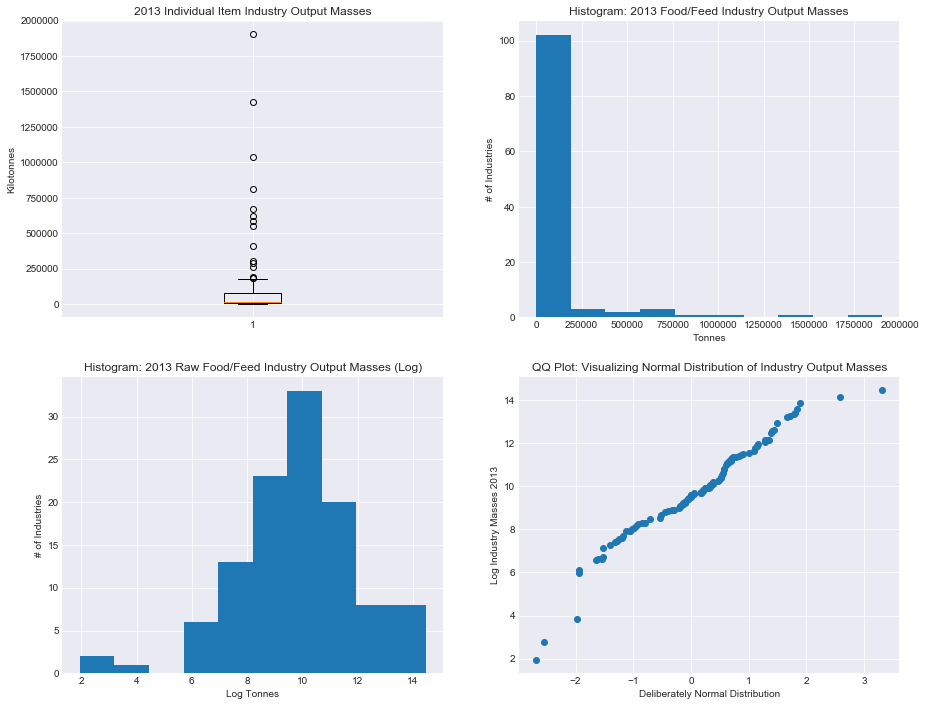

In [64]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.boxplot(IndustryOutput['Y2013'])
plt.title('2013 Individual Item Industry Output Masses')
plt.ylabel('Kilotonnes')

plt.subplot(2,2,2)
HistItemOutput2013 = IndustryOutput['Y2013'].replace(0,np.nan).dropna()
plt.hist(HistItemOutput2013)
plt.title("Histogram: 2013 Food/Feed Industry Output Masses")
plt.xlabel("Tonnes")
plt.ylabel("# of Industries")

plt.subplot(2,2,3)
#Histogram of Item Industry Log Output Mass in 2013
LogItemMass2013 = np.log(IndustryOutput['Y2013']).replace(-np.inf,np.nan).dropna()
#LogItemMass2013
plt.hist(LogItemMass2013)
plt.title("Histogram: 2013 Raw Food/Feed Industry Output Masses (Log)")
plt.xlabel("Log Tonnes")
plt.ylabel("# of Industries")

plt.subplot(2,2,4)
#Checking Normality of Log Distrubtion of Item Industry Mass in 2013 using a QQ Plot
norm1 = np.random.normal(0, 1, len(LogItemMass2013))
norm1.sort()
plt.plot(norm1, LogItemMass2013.sort_values(), 'o')
plt.xlabel("Deliberately Normal Distribution")
plt.ylabel("Log Industry Masses 2013")
plt.title("QQ Plot: Visualizing Normal Distribution of Industry Output Masses")

plt.show()

From both the boxplot and raw output histogram, it's easy to tell that most of the food and feed industries have relatively small outputs (less that 250000 kilotonnes) compared to the top 10 or so food and feed industries.

Taking the log of the raw industry outputs the histogram shows what looks like a much more normal distribution, and this is confirmed with a corresponding QQ.

Although these distrubutions are all for the industry outputs for 2013, for the sake of brevity, we will assume that all other years haver similar distributions.

But more than looking at one specific year, we explore the global output growth in the following four graphs:

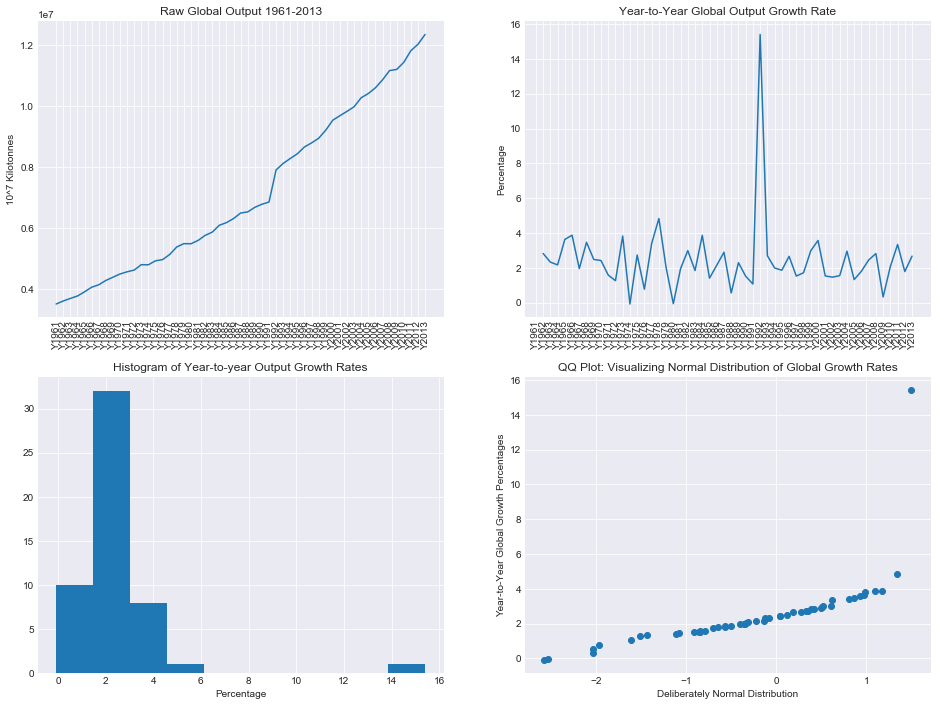

In [68]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
#create a variable that contains the sum of output across countries and industries over all years
TotGrowth = CountryOutput.sum().to_frame()
plt.plot(TotGrowth)
plt.title('Raw Global Output 1961-2013')
plt.xticks(rotation=90)
plt.ylabel('10^7 Kilotonnes')

plt.subplot(2,2,2)
#creating a variable that contains a dataframe of year-over-year percentage change
PctTotGrowth = TotGrowth.pct_change() * 100
plt.plot(PctTotGrowth)
plt.title('Year-to-Year Global Output Growth Rate')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
#creating variable that formats the percent growth rates into a proper form and datatype for plotting a histogram
ListPctTotGrowth = PctTotGrowth[0].values.tolist()[1:len(PctTotGrowth)]
plt.hist(ListPctTotGrowth)
plt.title('Histogram of Year-to-year Output Growth Rates')
plt.xlabel('Percentage')

plt.subplot(2,2,4)
#Checking Normality of Log Distrubtion of Item Industry Mass in 2013 using a QQ Plot
ListPctTotGrowth.sort()
norm2 = np.random.normal(0, 1, len(ListPctTotGrowth))
norm2.sort()
plt.scatter(norm2, ListPctTotGrowth)
plt.xlabel("Deliberately Normal Distribution")
plt.ylabel("Year-to-Year Global Growth Percentages")
plt.title("QQ Plot: Visualizing Normal Distribution of Global Growth Rates")

plt.show()

The Raw Global Output plot at the top left shows steady, healthy growth; although there is steep jump during the year 1992. The year-to-year growth rate plot (top right) confirms the steep slope: the growth rate jumped to just under 16% compared to the 2% growth rate that the real growth centers around.

Because the year axes for the Raw Global Output and Year-to-year growth plots are difficult to read, the code that returns the maximum growth and it's corresponding year is included below.

In [74]:
MaxYearGrowth = PctTotGrowth[PctTotGrowth == PctTotGrowth.max()].dropna()
MaxYearGrowth

,0
Y1992,15.403148


The output shows that 1992 is in fact the year with the greatest global growth between the years 1961 and 2013. The exact growth during that year is 15.4%. Visually, this is clearly an outlier, but to rigorously measure the extent by which the 1992 growth rate is different then the rest, a simple z-test is required. Observing the histogram and QQ plot of the Global Growth Rates, we see that the distribution of the global yearly growth rates is normal (except the singular 15.4% growth rate of course), thus a z-test is appropraiate.

In [82]:
MeanYearGrowth = PctTotGrowth.mean()
SDYearGrowth = PctTotGrowth.var() ** 0.5
zscore1 = ((MaxYearGrowth - MeanYearGrowth)/SDYearGrowth).values.tolist()[0][0]

print("The Mean Year-to-Year Global Feed/Food Growth Rate between 1961 and 2013 is {}".format(round(MeanYearGrowth[0],3)))
print("The SD of these growth rates is {}".format(round(SDYearGrowth[0],3)))
print("Therefore the 1991 to 1992 Global Growth rate is {} SD's away from the mean.".format(round(zscore1,3)))

The Mean Year-to-Year Global Feed/Food Growth Rate between 1961 and 2013 is 2.475
The SD of these growth rates is 2.095
Therefore the 1991 to 1992 Global Growth rate is 6.171 SD's away from the mean.


With the 1992 Global Growth Rate of 15.4% at 6.171 standard deviations (aka z-score: +6.171) above the mean of 2.475%, the corresponding p-value is less that 0.005 (a z-score of 3 corresponds to a 0.005 p-value). This means that, holding all conditions equal, there is less than a 0.5% chance that a growth rate of 15.4% or higher would be observed among the global growth rates. This percentage is extremely low and begs further investigation.

## Why did global food and feed output growth spike so dramatically in 1992?

As visulized earlier, 1992 experienced an uptick in Global Food Growth compared to all other years within the 1961-2013 time range: 15.4% growth compared to the average 2.48% growth per year. Which countries and which industries within those countries contributed most to the 1992 food growth? Which industries overall contributed most to 1992 food growth?

The first place to look for potential sources of increased output are the countries with the highest output overall during 1992.

In [83]:
#Top 10 Countries with highest output in 1992
CountryOutput['Y1992'].sort_values(ascending=False).head(10)

Area
China, mainland             1379165.0
United States of America     864199.0
India                        750584.0
Russian Federation           455486.0
Brazil                       277632.0
Japan                        216494.0
Germany                      211566.0
France                       170332.0
Ukraine                      157361.0
Nigeria                      154838.0
Name: Y1992, dtype: float64

Observing the top ten countries in terms of food and feed output, naturally, it is expected that the majority of these countries contributed to the intense growth.

To see how much growth changed between the different years within each country, we create a data frame that lists the actual difference in raw output in each country from the previous year for each year. Then we sort the dataframe by the countries with the greatest difference in 1992 - so that it's easy to tell which countries contributed the most food and feed output that year.

In [84]:
#Raw Output Year-to-Year Difference
CountryOutput.diff(axis=1).sort_values(by='Y1992', ascending=False).iloc[:,26:37].head(10)

,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997
Area,,,,,,,,,,,
Russian Federation,0.0,0.0,0.0,0.0,0.0,455486.0,-46093.0,-55495.0,-15893.0,-17890.0,15736.0
Ukraine,0.0,0.0,0.0,0.0,0.0,157361.0,-1177.0,-11920.0,-7286.0,-7359.0,-5409.0
"China, mainland",55876.0,22606.0,22856.0,44219.0,23678.0,83602.0,143166.0,83156.0,112715.0,98125.0,34991.0
Belarus,0.0,0.0,0.0,0.0,0.0,44161.0,2671.0,-2041.0,-2596.0,1040.0,-3965.0
Kazakhstan,0.0,0.0,0.0,0.0,0.0,43816.0,-3808.0,-580.0,-7894.0,-4644.0,-2898.0
India,18128.0,30781.0,36572.0,-9759.0,35305.0,34110.0,8227.0,21644.0,27654.0,15303.0,32632.0
United States of America,19274.0,-71513.0,36633.0,38472.0,-5115.0,33388.0,-13624.0,62765.0,-61627.0,54542.0,4649.0
Uzbekistan,0.0,0.0,0.0,0.0,0.0,32167.0,-1149.0,-1085.0,-50.0,-775.0,86.0
Republic of Moldova,0.0,0.0,0.0,0.0,0.0,11521.0,635.0,-1916.0,-83.0,-1127.0,1029.0


Observing just the top 10 countries in 1992 that contributed the greatest raw output growth, many of them like the US, Russian Federation, Mainland China, India, and Nigeria are in the top 10 countries of raw output in 1992.

More interestingly, 6 of the top 10 countries in terms of year-to-year raw output difference in 1992 listed outputs of 0 in all the years preceding 1992.

Why is that?

It seems that many countries had only begun having their food and agriculture data collected in 1992 - a plausible explanation for why the spike in growth was so intense. An introduction of countries into the data set adds a massive amount of output into the pool of global output that the data set accounts for.

What other countries, if any, were introduced into the data set in 1992?

In [95]:
#New countries that that FAO began collecting data on in 1992
country1992 = CountryOutput['Y1992'].replace(float(0.0),np.nan).dropna()
country1991 = CountryOutput['Y1991'].replace(float(0.0),np.nan).dropna()
New1992Countries = list(set(country1992.index.tolist()) - set(country1991.index.tolist()))
print('{} new countries began contributing their food/feed output to the data set in 1992.'.format(len(New1992Countries)))
New1992Countries

19 new countries began contributing their food/feed output to the data set in 1992.


['Uzbekistan',
 'Armenia',
 'Republic of Moldova',
 'Belarus',
 'Estonia',
 'Latvia',
 'Kazakhstan',
 'Turkmenistan',
 'Tajikistan',
 'Croatia',
 'Georgia',
 'Ukraine',
 'Slovenia',
 'The former Yugoslav Republic of Macedonia',
 'Russian Federation',
 'Bosnia and Herzegovina',
 'Azerbaijan',
 'Lithuania',
 'Kyrgyzstan']

Observing all of the new countries in 1992, they all happen to either near or part of the former USSR. The USSR fell in December 1991 and gave way to about 15 new countries - allowing the United Nations to subsequently collect data from each of these countries starting in 1992. The United Nations was perhaps unable to collect agricultural data from the USSR during its communist rule.

In [96]:
#Aggregate output of all the new countries in the data set in 1992
New1992CountryOutput = CountryOutput.loc[New1992Countries]
New1992CountryOutput.sum()['Y1992']

830665.0

In total, the new countries in 1992 had available 830665 kilotonnes of food and feed in 1992. To put this in persepctive, the United States had available 864199 kilotonnes of food and feed in 1992. Introducing these countries to the data set is the equivalent of introducing another country equal in size to the United States, which produced the second most agricultural output in 1992.

While it is interesting that the spike in growth was due to an introduction of data to the dataset, it would have been more interesting to have observed such a change in the real raw global output in 1992.

For the sake of further exploration, we graph the output of the new countries introduced in 1992 from 1992 forward.

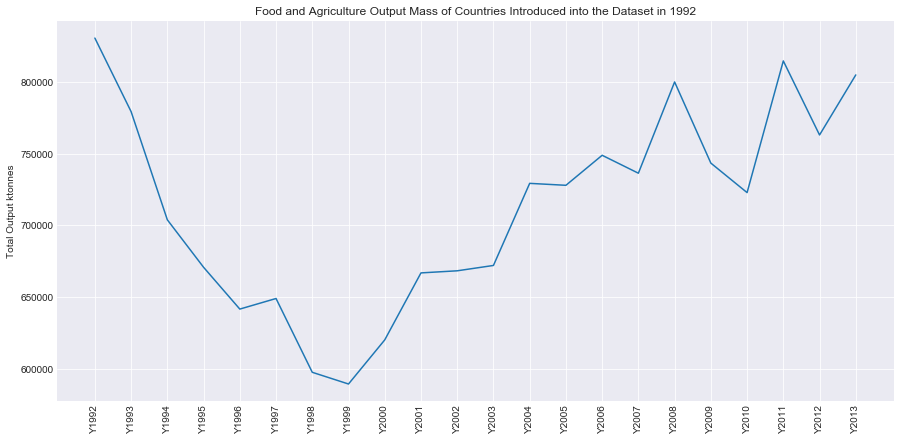

In [98]:
plt.figure(figsize=(15,7))
plt.plot(New1992CountryOutput.sum()[31:])
plt.title('Food and Agriculture Output Mass of Countries Introduced into the Dataset in 1992')
plt.ylabel('Total Output ktonnes')
plt.xticks(rotation=90)

plt.show()

Another interesting trend in the former USSR Countries is that their feed and food output decreased dramatically throughout the 1990's despite having switched to market economies.

A quick [Wikipedia](https://en.wikipedia.org/wiki/Economic_history_of_the_Russian_Federation#Transition_to_market_economy) search shows that this dip in agricultural output was part of a larger economic contraction that actually had to do with a decrease in wasteful spending that lingered from the USSR. So while the economy was contracting, this decrease in wasteful production exaggerates the extent to which the economy contracted. Afterall, switching from communist to a market economy can only be good for a country.

Finally, knowing that the dataset aritificially inflated real growth in 1992, we graph the mean agricultural output of all countries as a better visual proxy for real global output growth trends.

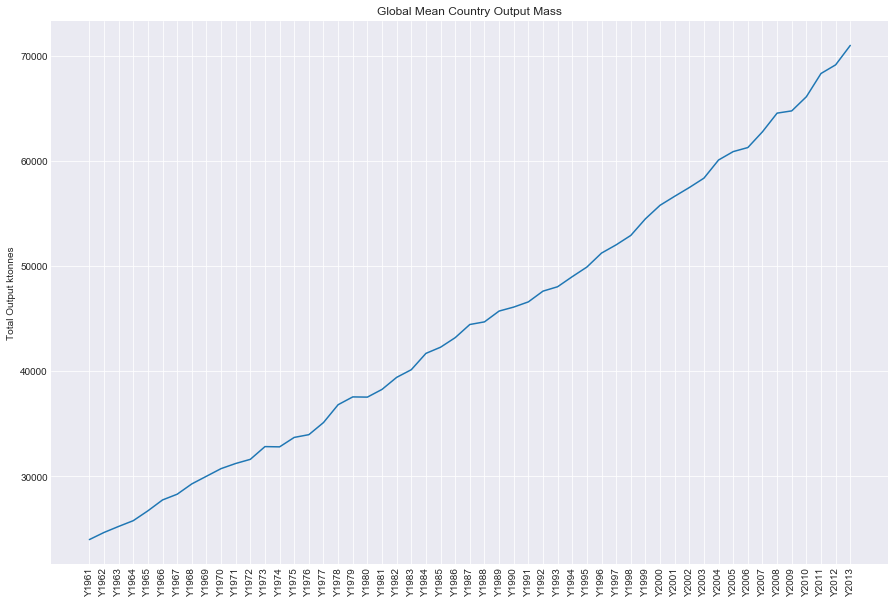

In [99]:
plt.figure(figsize=(15,10))
plt.plot(CountryOutput.replace(float(0.0),np.nan).mean(axis=0))
plt.title('Global Mean Country Output Mass')
plt.ylabel('Total Output ktonnes')
plt.xticks(rotation=90)
plt.show()

And we thus observe no abnormally large growth patterns in the mean global country growth. Global country output mean shows a steady growth from 1961 to 2013.

## What food trends can we find within Southeast Asia?

Peering at the countries included in the dataset, the countries considered part of the Southeast Asian geographical region that are included in the data set are:

- The Philippines
- Thailand
- Indonesia
- Cambodia
- Malaysia
- Myanmar
- Vietnam
- Laos
- Brunei
- Timor-Leste

Singapore is not included in the data set. Included in the analysis are all the above listed Southeast Asian countries. For brevity's sake, Southeast Asia(n) will written as SEA.

Visualized below are the aggregate growth and year-to-year growth rates of SEA countries.

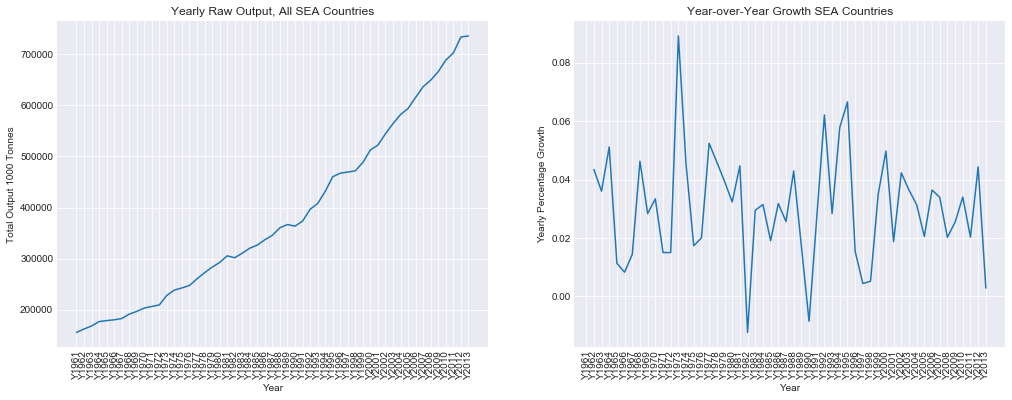

In [101]:
#Creating a dataset with South East Asian Data
seasiadf = faodf[faodf['Area'].isin(['Philippines','Thailand','Indonesia','Cambodia','Malaysia','Myanmar','Viet Nam','Lao People\'s Democratic Republic','Brunei Darussalam','Timor-Leste'])]

#South East Asian Aggregate Country Output
SEACountryOutput = seasiadf.groupby('Area').sum().drop(['Area Code', 'Item Code', 'Element Code', 'longitude', 'latitude'],axis=1)

#South East Asian Aggregrate Industry Output
SEAIndustryOutput = seasiadf.groupby('Item').sum().drop(['Area Code', 'Item Code', 'Element Code', 'longitude', 'latitude'],axis=1)

#Visualizing Aggregate Output across time in SEA
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(SEACountryOutput.sum(axis=0))
plt.xlabel('Year')
plt.ylabel('Total Output 1000 Tonnes')
plt.title('Yearly Raw Output, All SEA Countries')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.plot(SEACountryOutput.sum(axis=0).pct_change())
plt.title('Year-over-Year Growth SEA Countries')
plt.ylabel('Yearly Percentage Growth')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.show()

There are no overtly obvious changes in growth based on the above growth graphs. There is relatively steady growth in food and feed output from 1961 to 2013 within the SEA countries.

We continue exploring the data set by looking at the top industries in 2013.

In [102]:
#Current Largest Industries by size in SEA (using 2013 data)
SEAIndustryOutput['Y2013'].sort_values(ascending=False).head(15)

Item
Cereals - Excluding Beer    149167
Rice (Milled Equivalent)     95108
Fruits - Excluding Wine      42929
Vegetables                   41817
Maize and products           38443
Vegetables, Other            37218
Starchy Roots                27925
Milk - Excluding Butter      22864
Fish, Seafood                22544
Cassava and products         20146
Fruits, Other                19761
Meat                         18039
Wheat and products           14936
Bananas                      13254
Sugar & Sweeteners           12732
Name: Y2013, dtype: int64

Staple food like cereals, rice, fruits, vegetables, wheat, and corn are understandably the most as these products comprise the foundation of nutrition for normal human functioning and energy.

To find more interesting food trends, we now industries in terms how many times over the industry has multiplied in terms of its 1961 output since 1961 in 2013.

In [103]:
#Industries that have experienced the most relative growth in SEA since 1961 (Factor Change between 1961 and 2013)
SEAIndustryOutputTotGrowth = (SEAIndustryOutput['Y2013'] - SEAIndustryOutput['Y1961']) / SEAIndustryOutput['Y1961']
SEAIndustryOutputTotGrowth.sort_values(ascending=False).replace([np.inf, -np.inf], np.nan).dropna().head(10)

Item
Palmkernel Oil                     212.000000
Oilcrops, Other                     84.000000
Palm Oil                            76.272727
Cocoa Beans and products            75.285714
Apples and products                 68.000000
Oats                                59.000000
Grapes and products (excl wine)     45.750000
Citrus, Other                       43.000000
Wine                                42.000000
Butter, Ghee                        27.250000
dtype: float64

Using Palmkernel Oil as an example, the numbers above mean that the 2013 outoput of Palmkernel Oil is 212 times that of the output of Palmkernel Oil in 1961.

This of course does not mean that these industries produced more in raw output terms than any other industry. In fact, none of the industries listed in the top 10 industries in terms of raw 2013 output are included in this top 10 list of industries that have experienced the greatest relative growth since 1961.

But by observing the magnitude by which an industry's output has changed since 1961, we hone in on more interesting food industry trends.

Palm oil significantly increased in production since 2013 within SEA countries, calling for an exploration of Palm, it's oils, and other plant based oil products more thoroughly. Provided below is an initial exploratory visualization of Palmkernel Oil growth.

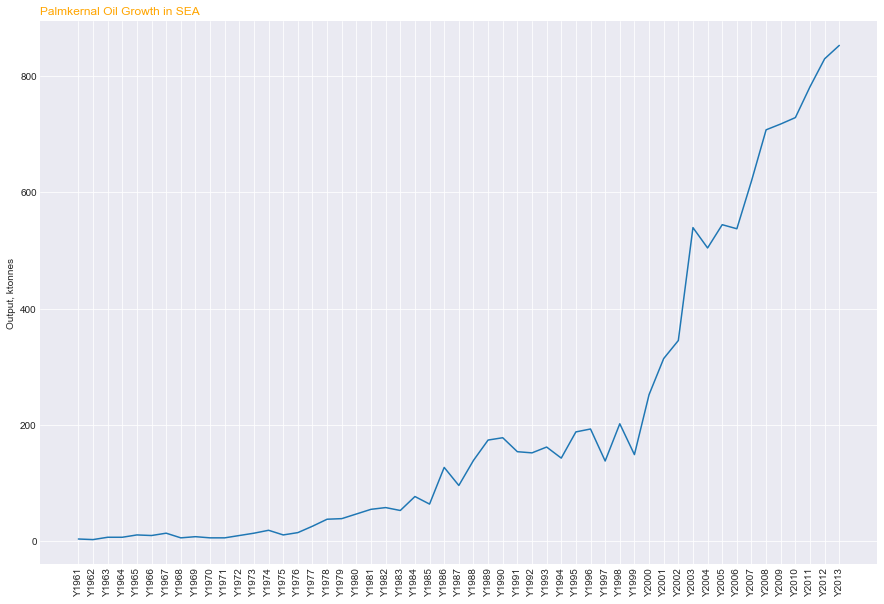

In [104]:
#Visualizing Palmkernel in SEA Countries
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 10 
plt.rcParams["figure.figsize"] = fig_size
plt.plot(SEAIndustryOutput.loc['Palmkernel Oil'])
plt.title('Palmkernel Oil Growth in SEA', loc='left', color='orange')
plt.ylabel('Output, kilotonnes')
plt.xticks(rotation=90)

plt.show()

It seems Palmkernel Oil output growth took off in 1999. Still, the Palmkernel Oil industry only produced just above 800 kilotonnes of output, which is near the lower end of production output masses compared all the others industries. Its increase in production from single-digit kilotonnes in 1961 is nonetheless interesting, so we compare the growth of Palmkernel oil to other plant based oil industries in SEA.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


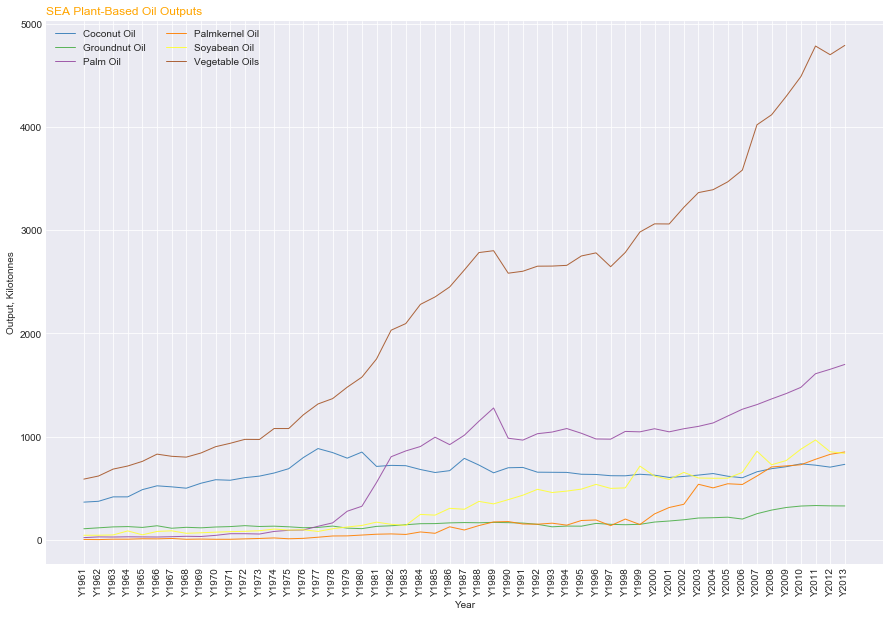

In [106]:
#**Plotting Output of Food Oil Industry Output**#

#Creating list of oils
OilList = []
for i in SEAIndustryOutput.index.tolist():
    if 'Oil' in i:
        OilList.append(i)
        
#Removing the Generic 'Oilcrops' from the list to focus analysis on specific oils 
OilList.remove('Oilcrops')

#Creating New list of Oils that exclude oils with a 2013 output less than 100 ktons
SEAOilOutput = SEAIndustryOutput.loc[OilList][SEAIndustryOutput['Y2013'] > 100]
SEAOilOutput
OilList2 = []
for i in SEAOilOutput.index.tolist():
    if 'Oil' in i:
        OilList2.append(i)

#Creating a color palette
palette = plt.get_cmap('Set1')
 
#Creating a Multiple Line Plot
num=0
for Oil in OilList2:
    num+=1
    plt.plot(SEAOilOutput.T[Oil], marker='', color=palette(num), linewidth=1, alpha=0.9, label=Oil)

plt.title("SEA Plant-Based Oil Outputs", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Output, Kilotonnes")
plt.xticks(rotation=90)
plt.legend(loc=2, ncol=2)

plt.show()

To keep the SEA Oil Outputs readable, oil industries with 2013 outputs too large or too small were excluded. The Oilcrops Industry was also excluded because it is not a specific plant-based oil.

One interesting observation is that soybean oil actually exhibits a similar growth trend as palmkernel oil, although the growth of soybean oil was much more steady compared to the large growth increase of palmkernel at the end of the 1990's.

Coconut oil, interestly, maintained what seems almost a constant yearly output since the 1970's.

Palm Oil had actually experienced much greater raw output growth compared to the oil of it's kernel. (Palm oil comes from the fruit of the palm while the palmkernel oil comes from the seed.) The Palm Oil industry increased significantly by the end of 1970's, long before Palmkernel oil showed significant growth. Palm and palmkernel oil products have seen a significant increase in production since 1961.

[Greenpalm.org](https://greenpalm.org/about-palm-oil/why-is-palm-oil-important) touts palm oils for their versality to recreate different oil properties as well as their efficiency of production. Despite their popularity, it's unfortuante that palm oil has been linked to the destruction of many rainforests in Malaysia and Indonesia.

Taking the exploration further, we now look to see how whether there happen to be trends between different industries by comparing them using a correlation matrix. The chosen industries include plant and animal based oils, as well as grains and starches that normally indicate economic and population growth. And specifically related to palm oil, it would be interesting to observe whether palm oil or palmkernel oil were affected by other affected other oil or grain industries.

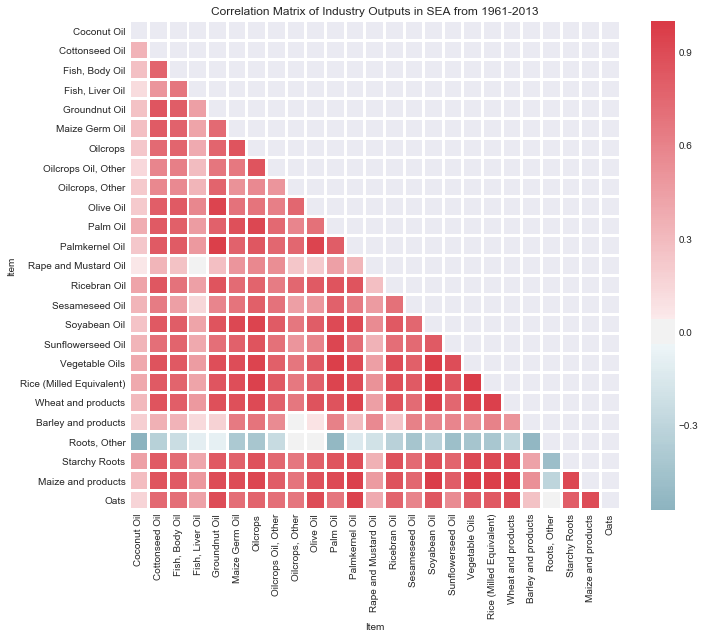

In [117]:
#**Creating Correlation Matrix to Compare Agricultural Industries in Southeast Asia**#

#Selectively choosing industry keywords to compare industries.
SEACorrList = []
kwitems = ['Oil','Rice','Wheat','Barley','Root','Maize','Oat']
for kw in kwitems:
    for item in SEAIndustryOutput.index.tolist():
        if kw in item and item not in SEACorrList:
            SEACorrList.append(item)

#Taking the correlations between each industries and setting up the matrix
SEAIndCorr = SEAIndustryOutput.T[SEACorrList].corr()

mask = np.zeros_like(SEAIndCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(SEAIndCorr, mask=mask, cmap=cmap, center=0,square=False, linewidths=2)
ax.set_title('Correlation Matrix of Industry Outputs in SEA from 1961-2013')

plt.show()

The correlation matrix above correlates 25 different industry outputs within SEA against each other. The most noticeable pattern from this graph is that generally, all the industries that grew, correlate positively at least mildly since growth in one industry was accompanied by another. The general hue of red stays relatively constant for the corresponding row and column of an industry, which inadvertantly indicates how it grew compared to industries with larger growth.

Coconut oil, for example, showed week growth (arguably constant output) in the previous plot of outputs over time of the plant-based oil industries. And the correlation matrix shows a light colored hue of red for the most part, meaning it only slightly correlated with other industries that experience greater growth.

The 'Rootes, Other' industry of course experience a shrinkage of output since 1961.

Industries that correlated strongly with each other includ many of the grains and wheat products. Staple starches will naturally correlate strongly and positively because they are the primary energy source for a population.

All this said, there are no indications of particular industries that demonstrate a noteworthy correlation. It's apparent that the industries correlate simply because they are all experiencing growth. Since correlation does not imply causation, this correlation matrix simply affirms that some industries are growing more strongly than others.

Despite the rise in palm oil production, it doesn't not appear that we can draw any conclusions about whether it affected was affected by grain and other oil industries in SEA.

# How much livestock does the Global Feed Output produce?

The motivating impetus of this question is an interest in observing the environmental impact of producing livestock. Utilization the distinction between food and feed industries within the dataset, we map the amount of feed that is assumed to produce livestock.

In [112]:
#Creating Dataframes that separate the Food data from the Feed Data
FeedOutput = faodf.loc[faodf['Element'] == 'Feed'].groupby('Item').sum().iloc[:,5:]
FoodOutput = faodf.loc[faodf['Element'] == 'Food']

#Creating a list of food industries that are considered livestock or livestock derivatives
kwLivestock = ['Meat','Offals','Butter','Cream','Fat','Eggs','Animal fats']
LivestockList = []
for kw in kwLivestock:
    for stock in FoodOutput['Item'].unique().tolist():
        if stock not in LivestockList and kw in stock:
            LivestockList.append(stock)

The livestock industry list was chosen based on animals that were eaten for food as well as the dairy and far products that are derived from them. The list of industries included for the analysis of livestock is as follows.

In [114]:
LivestockList

['Bovine Meat',
 'Mutton & Goat Meat',
 'Poultry Meat',
 'Meat, Other',
 'Meat',
 'Meat, Aquatic Mammals',
 'Offals, Edible',
 'Offals',
 'Butter, Ghee',
 'Milk - Excluding Butter',
 'Cream',
 'Fats, Animals, Raw',
 'Eggs',
 'Animal fats']

This list of livestock industries was then used to create a livestock output dataframe that were then graphed against the total Feed output. 

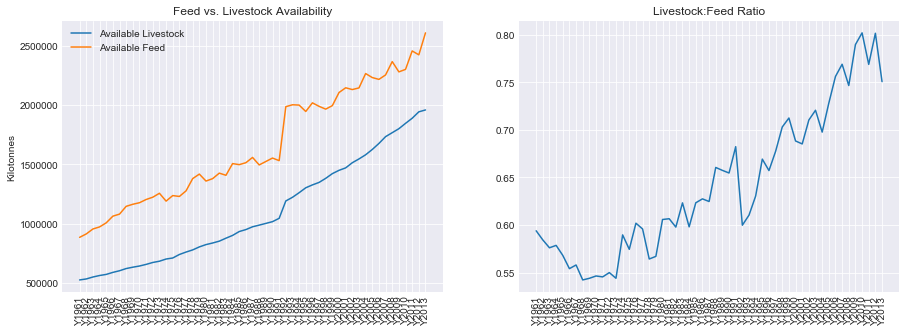

In [116]:
#Creating the Dataframes of Livestock time series data to plot.
LivestockOutput = FoodOutput.groupby('Item').sum().T[LivestockList].T.iloc[:,5:]
LivestockTot = LivestockOutput.sum()

#Creating the total Feed output for plotting
FeedConsumed = FeedOutput.sum()

#Plotting available food vs. available feed from 1961 to 2013
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Feed vs. Livestock Availability')
plt.ylabel('Kilotonnes')
plt.plot(LivestockTot, label='Available Livestock')
plt.plot(FeedConsumed, label='Available Feed')
plt.legend(loc=2)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title('Livestock:Feed Ratio')
plt.plot(LivestockTot/FeedConsumed)

plt.xticks(rotation = 90)

plt.show()

The iterpretation of these graphs and their relation to the amount of feed that produces the available livestock is not a clear one.

For one, the Food and Feed categories are figures that indicate how much mass of industry is *available* for consumption during a given reference year. The data does not indicate how much was necessarily produced nor how much was consumed. Thus, the assumption that we must be careful not to make (unless intentionally) is that all of the available feed is completely consumed by the livestock that year. It's possible that farmers are storing feed from previous years and continuing to store feed that they produce for use in future years.

Second, assuming that feed is eventually all fed to the livestock, the ratio of livestock to feed still increases from 1961 to 2013. From a biological perspective of trophic levels, only a certain percentage of consumed organism's energy will be taken up by the animal (or other organism) that consumes it. What I would expect for the slope of the available Feed mass to slope higher than the available livestock mass plot. However, both Livestock and Feed trend upward in growth with visually the same slope.

We can see how this similar output growth rate between livestock and feed affects their ratio. Because the differnce in mass between livestock and remains relatively constant as time progresses, the ratio of livestock to feed increases drastically from 1961 to 2018.

One possible explanation for this phenonmenon is that the feed produced for animals is  more nutrient and energy rich, requiring less of the feed in weight per animal. Also, it's possible animals are being raised and selectively bred to eat less food while gaining a heavier mass with less food. But this is all speculation.

Finally to answer the original question:

While it's not clear exactly how much feed is used to produce the available livestock (since it's always changing), according to the output graph, it seems that reducing consumption of meat and other livestock derivatives would reduce the carbon footprint of livestock feed in a one-to-one manner.

## Further Questions and Research

Many of the explorative rabbit holes only invoke further questions:
1. What industries within the former USSR countries decreased in the 1990's as result of more market based agricultural production?
2. Are there relationships between industries of different countries within SEA? For example, would the rise of palmkernel oil in one country correlate with the rise or decline of another industry in another local country?
3. What industries specializations does each country have to compete for use on an international market?

To answer the first question I would look at are the food/feed data for the former USSR countries and see which specific industries decreased the lowest.

To answer the second question I would run a larger correlation against production outputs that specify the SEA country, the industry, and the food/feed element. Because there are likely to be multiple industries that correlate mildly due to the mere fact that they increase or decrease or decrease over time, I would filter out corratlation between -0.9 and 0.9 to ensure that I'm honing in on industries between countries that correlate strongly. I would probably also filter out correlation between different grains only because grains tend to grow with population growth and it would be no surprise whether that their correlations against each other are strong.

To answer the third questions, I would create a dataframe that lists each item industry and ranks each country by the amount of the raw industry output that they produce, as well as rank countries by how much of their domestic market share the specific industry comprises. Seeing this rankings will show where certain item industries tend to be produced or consumed.